<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Dynamic systems: 11. Reactions
## Numerical differential operators
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

----
In this notebook, we derive operators for numerically calculating **diffusion** and **advection**
terms. We start with **one-dimensional functions**, then expand to **two dimenions**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

----
## 1D function

Consider the 1D function $f(x)$ and its first and second derivative:
$$
\begin{array}{rcl}
f(x) &=& x^2 \\
\frac{d}{dx} f(x) &=& 2x \\
\frac{d^2}{dx^2} f(x) &=& 2
\end{array}
$$
We define these three functions **analytically** and plot them in the interval $x \in [-3,3]$:

In [2]:
def f(x):
    # 1D function
    return x**2

def df(x):
    # first derivative of 1D function
    return 2*x

def d2f(x):
    # second derivative of 1D function
    return 2.*np.ones(len(x))

In [3]:
x,dx  = np.linspace(-3,3,41,retstep=True)
print('dx: ',dx)
#dx = x[1]-x[0]

dx:  0.15


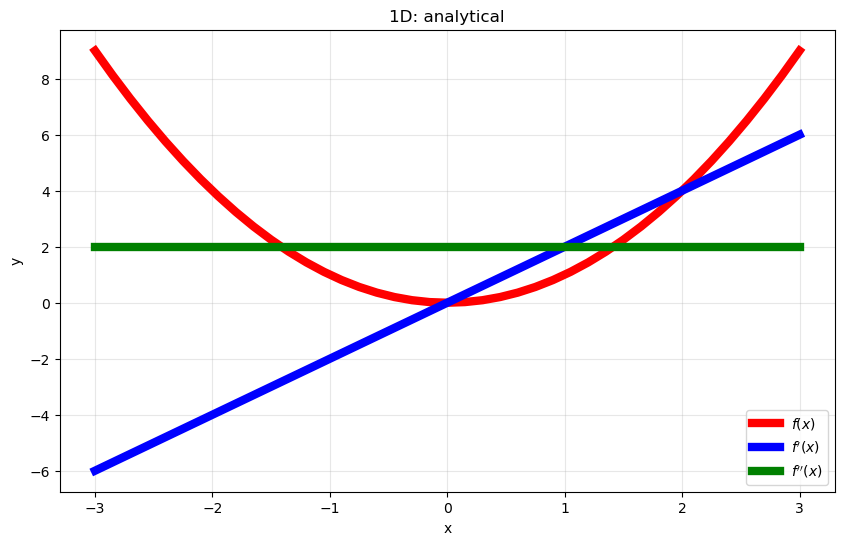

In [4]:
plt.figure(figsize=(10,6))
plt.title('1D: analytical')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(alpha=0.3)
plt.plot(x,f(x),linewidth=6,color='red',label='$f(x)$')
plt.plot(x,df(x),linewidth=6,color='blue',label='$f\'(x)$')
plt.plot(x,d2f(x),linewidth=6,color='green',label='$f\'\'(x)$')
plt.legend()

We reformulate the first and second-order derivatives into **finite-difference operators**:
$$
\begin{array}{rcl}
\frac{\displaystyle d}{\displaystyle dx}f(x_0) 
&=& \frac{\displaystyle f(x_0+h) - f(x_0-h)}{\displaystyle 2h} + O(h^2) \\
\frac{\displaystyle d^2}{\displaystyle dx^2}f(x_0) 
&=& \frac{\displaystyle f(x_0+h) + f(x_0-h) - 2f(x_0)}{\displaystyle h^2} + O(h^2)
\end{array}
$$

In [5]:
def gradient1D(f,x,dx):
    # 1D first-derivative operator
    # central difference
    gradient1D = (f(x+dx)-f(x-dx)) / (2*dx)
    return gradient1D

def laplacian1D(f,x,dx):
    # 1D second-derivative operator
    # central difference
    laplacian1D = (f(x+dx)+f(x-dx)-2*f(x)) / (dx**2)
    return laplacian1D

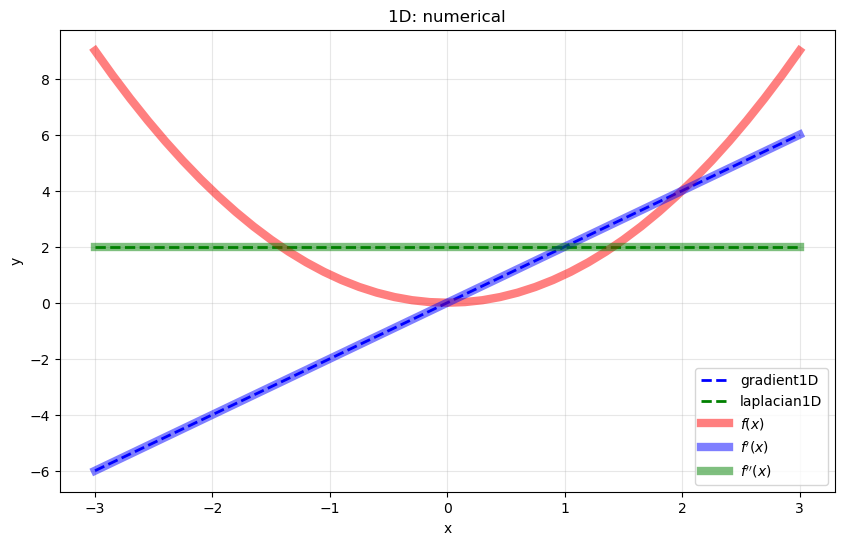

In [6]:
plt.figure(figsize=(10,6))
plt.title('1D: numerical')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(alpha=0.3)
plt.plot(x,gradient1D(f,x,dx),lw=2,ls='dashed',color='blue',alpha=1.0,label='gradient1D')
plt.plot(x,laplacian1D(f,x,dx),lw=2,ls='dashed',color='green',alpha=1.0,label='laplacian1D')
plt.plot(x,f(x),lw=6,color='red',alpha=0.5,label='$f(x)$')
plt.plot(x,df(x),lw=6,color='blue',alpha=0.5,label='$f\'(x)$')
plt.plot(x,d2f(x),lw=6,color='green',alpha=0.5,label='$f\'\'(x)$')
plt.legend()

Works!

----
## 2D function

Next, consider the 2D function $f(x,y)$ and its first and second derivative:
$$
\begin{array}{rcl}
f(x,y) &=& x^2+y^3 \\
\nabla f(x,y) &=& \left( 2x,3y^2 \right)^T \\
\nabla^2 f(x,y) &=& 2+6y
\end{array}
$$
Here, $\nabla=(\frac{d}{dx},\frac{d}{dy})^T$ and 
$\nabla^2=\Delta=(\frac{d^2}{dx^2}+\frac{d^2}{dy^2})$
holds.

We define these three functions and plot them in the interval $x \in [-4,4]$ and $y \in [-2,2]$:

In [7]:
x,dx = np.linspace(-4,4,101,retstep=True)
y,dy = np.linspace(-2,2,51,retstep=True)
print('dx: ',dx,' dy: ',dy)
X,Y = np.meshgrid(x,y)

dx:  0.08  dy:  0.08


With `np.meshgrid`, we expanded the two 1D arrays $x$ and $y$ into 
two 2D arrays $X$ and $Y$.

Note that `meshgrid` assigns our $x$, which we think as horizontal axis, in the default setting
(`indexing='xy'`) along the **second** axis, the **column** axis. That is what we want!

`python` and especially `numpy`always have the **row** axis first, as vertical axis.

### Analytical solutions

In [8]:
def fxy(x,y):
    # 2D function
    fxy = x**2+y**3
    return fxy

def dfxy(x,y):
    # first derivative of 2D function
    dxfxy = 2*x
    dyfxy = 3*y**2
    return dxfxy,dyfxy

def d2fxy(x,y):
    # second derivative of 2D function
    dx2fxy = 2+6*y
    return dx2fxy

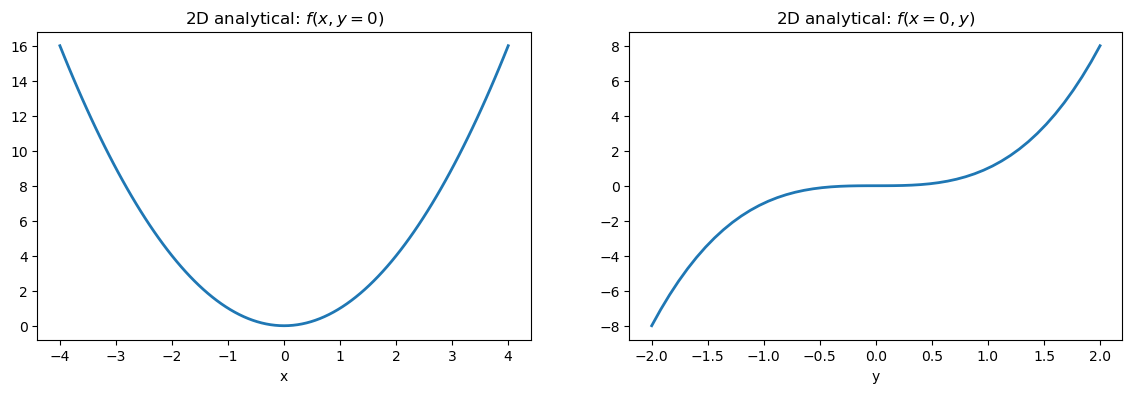

In [19]:
fig,axs = plt.subplots(1,2,figsize=(14,4))
axs[0].set_title('2D analytical: $f(x,y=0)$')
axs[0].set_xlabel('x')
axs[0].plot(X[Y==0],fxy(X[Y==0],Y[Y==0]),lw=2)

axs[1].set_title('2D analytical: $f(x=0,y)$')
axs[1].set_xlabel('y')
axs[1].plot(Y[X==0],fxy(X[X==0],Y[X==0]),lw=2)

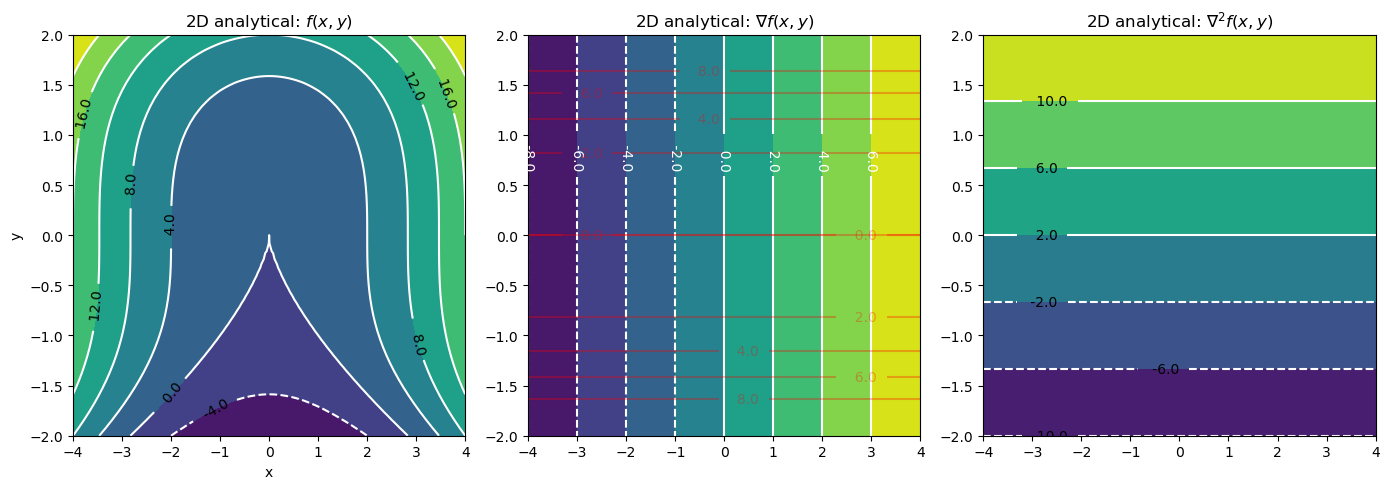

In [9]:
fig,axs = plt.subplots(1,3,figsize=(14,5))
axs[0].set_title('2D analytical: $f(x,y)$')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].contourf(X,Y,fxy(X,Y))
cs0=axs[0].contour(X,Y,fxy(X,Y),colors='white')
axs[0].clabel(cs0, inline=1, fontsize=10,fmt='%5.1f',colors='black')

axs[1].set_title('2D analytical: $\\nabla f(x,y)$')
axs[1].contourf(X,Y,dfxy(X,Y)[0],levels=np.linspace(-8,8,9))
csx=axs[1].contour(X,Y,dfxy(X,Y)[0],levels=np.linspace(-8,8,9),colors='white')
csy=axs[1].contour(X,Y,dfxy(X,Y)[1],levels=np.linspace(-8,8,9),colors='red',alpha=0.3)
axs[1].clabel(csx, inline=1, fontsize=10,fmt='%5.1f',colors='white')
axs[1].clabel(csy, inline=1, fontsize=10,fmt='%5.1f',colors='red')

axs[2].set_title('2D analytical: $\\nabla^2 f(x,y)$')
axs[2].contourf(X,Y,d2fxy(X,Y),levels=np.linspace(-10,14,7))
csxy=axs[2].contour(X,Y,d2fxy(X,Y),colors='white',levels=np.linspace(-10,14,7))
axs[2].clabel(csxy, inline=1, fontsize=10,fmt='%5.1f',colors='black')

plt.tight_layout()

### Numerical solutions

We reformulate the first and second-order derivatives into **central finite-difference operators**:
$$
\begin{array}{rcl}
\frac{\displaystyle d}{\displaystyle dx}f(x,y) 
&=& \frac{\displaystyle f(x+dx,y) - f(x-dx,y)}{\displaystyle 2\Delta x} + O(h^2) \\
\frac{\displaystyle d}{\displaystyle dy}f(x,y) 
&=& \frac{\displaystyle f(x,y+dy) - f(x,y-dy)}{\displaystyle 2\Delta y} + O(h^2) \\
\left( \frac{\displaystyle d^2}{\displaystyle dx^2} +
       \frac{\displaystyle d^2}{\displaystyle dy^2} \right) f(x,y)
&=&
\frac{\displaystyle f(x+dx,y) - 2f(x,y) + f(x-dx,y)}{\displaystyle \Delta x^2} +
\frac{\displaystyle f(x,y+dy) - 2f(x,y) + f(x,y-dy)}{\displaystyle \Delta y^2} + O(h^2)
\end{array}
$$

This first set of operators uses the `np.roll()`. function, which shifts an array along the defined axis right ($*$)
or left ($-$). Thus

- `np.roll(F,-1,axis=1)` calculates $F(X,Y)$ at X+dx along the second axis (the $x$ axis!)
- `np.roll(F,+1,axis=1)` calculates $F(X,Y)$ at X-dx along the second axis (the $x$ axis!)

As `np.roll()` rolls over the indices along the edges, we introduce artefacts in the derivatives in this case.

In [10]:
def gradient2D(f,x,y,dx,dy):
    """
    2D horizontal gradients of scalar field f(x,y), nabla f(x,y)
    """
    F = f(x,y)
    gradient2Dx = np.roll(F,-1,axis=1)-np.roll(F,+1,axis=1)
    gradient2Dx /= 2*dx
    gradient2Dy = np.roll(F,-1,axis=0)-np.roll(F,+1,axis=0)
    gradient2Dy /= 2*dy
    return gradient2Dx,gradient2Dy

def laplacian2D(f,x,y,dx,dy):
    """
    2D Laplacian of scalar field f(x,y), nabla^2 f(x,y)
    """
    F = f(x,y)
    laplacian2D = np.roll(F,-1,axis=1)+np.roll(F,+1,axis=1)
    laplacian2D += np.roll(F,-1,axis=0)+np.roll(F,+1,axis=0)
    laplacian2D -= 4*F
    laplacian2D /= dx*dy
    return laplacian2D

This second set of operators calculates the differential operators directly,
shifting the $X$ and $Y$ coordinates. 

Note that we need to use `np.add(X,dx)` to add the scalar offset $dx$ all **all elements** of the 2D array$X$. 

In [20]:
def gradient2D(f,x,y,dx,dy):
    """
    2D horizontal gradients of scalar field f(x,y), nabla f(x,y)
    """
    gradient2Dx = (f(np.add(x,dx),y) - f(np.add(x,-dx),y)) / (2*dx)
    gradient2Dy = (f(x,np.add(y,dy)) - f(x,np.add(y,-dy))) / (2*dy)
    return gradient2Dx,gradient2Dy

def laplacian2D(f,x,y,dx,dy):
    """
    2D Laplacian of scalar field f(x,y), nabla^2 f(x,y)
    """
    d2fdx2 = (f(np.add(x,dx),y) + f(np.add(x,-dx),y) - 2*f(x,y)) / dx**2
    d2fdy2 = (f(x,np.add(y,dy)) + f(x,np.add(y,-dy)) - 2*f(x,y)) / dy**2
    laplacian2D = d2fdx2 + d2fdy2
    return laplacian2D

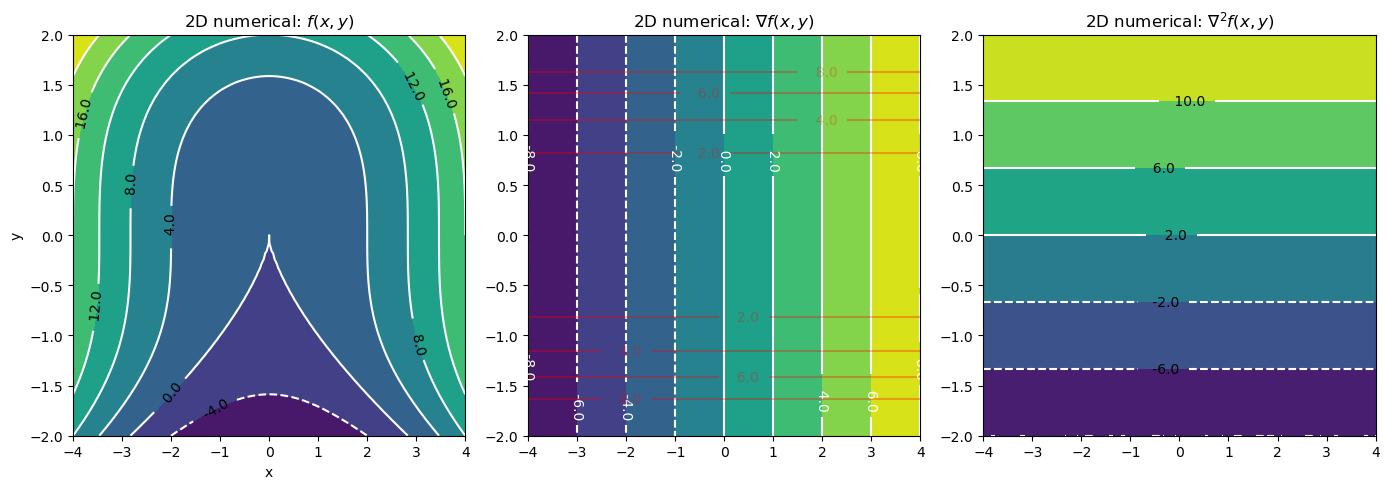

In [21]:
fig,axs = plt.subplots(1,3,figsize=(14,5))
axs[0].set_title('2D numerical: $f(x,y)$')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].contourf(X,Y,fxy(X,Y))
cs0=axs[0].contour(X,Y,fxy(X,Y),colors='white')
axs[0].clabel(cs0, inline=1, fontsize=10,fmt='%5.1f',colors='black')

axs[1].set_title('2D numerical: $\\nabla f(x,y)$')
axs[1].contourf(X,Y,dfxy(X,Y)[0],levels=np.linspace(-8,8,9))
csx=axs[1].contour(X,Y,gradient2D(fxy,X,Y,dx,dy)[0],levels=np.linspace(-8,8,9),colors='white')
csy=axs[1].contour(X,Y,gradient2D(fxy,X,Y,dx,dy)[1],levels=np.linspace(-8,8,9),colors='red',alpha=0.3)
axs[1].clabel(csx, inline=1, fontsize=10,fmt='%5.1f',colors='white')
axs[1].clabel(csy, inline=1, fontsize=10,fmt='%5.1f',colors='red')

axs[2].set_title('2D numerical: $\\nabla^2 f(x,y)$')
axs[2].contourf(X,Y,d2fxy(X,Y),levels=np.linspace(-10,14,7))
csxy=axs[2].contour(X,Y,laplacian2D(fxy,X,Y,dx,dy),levels=np.linspace(-10,14,7),colors='white')
axs[2].clabel(csxy, inline=1, fontsize=10,fmt='%5.1f',colors='black')

plt.tight_layout()

Works!

... done